Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Tiago Flora"
COLLABORATORS = "Ba Thien"

---

# CS110 Pre-class Work 6.2

## Part A. Median-of-3 partitioning quicksort 

## Question 1.

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [2]:
import timeit
import random

# Define an upper bound and a number of iterations
eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    """
    Input: Three numbers (int or float)
    
    Output: Median number of the three
    """
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):
    """
    Input: Unsorted list of floats or ints
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements in the partition
        
        # List of first, middle, and last indices of the list
        inds = [frm + int(N * n) for n in locations]
        
        # List of the elements at the positions in inds
        values = [lst[ind] for ind in inds]
        
        # Define partition as the median of the values at the three positions above
        partition = median(*values)

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():
    """
    Input: None
    
    Output: Sorted list (from a randomly shuffled list of consecutive integers)
    """
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():
    """
    Checks whether our randomized quicksort algorithm works
    
    Input and Output: None
    """
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct?
test_quicksort()

# How fast is our algorithm?
print(timeit.timeit(randomized_quicksort, number=1))

0.06699719999999987


## Question 2.

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

Besides the fact that the randomized partition chooses a random list element to swap with the last element (which is still used as pivot in the partition), we have that in Cormen's randomized-quicksort is recursive. In our code, we use a `while` loop to continuously perform the operations in the algorithm on the subarrays.

## Question 3.
What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

In [3]:
import time
import matplotlib.pyplot as plt

trials = 10
n = 100

def qsort_one(lst):
    """
    Input: Unsorted list of floats or ints
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements in the partition
        
        # List of first, middle, and last indices of the list
        inds = [frm + int(N * n) for n in locations]
        
        # List of the elements at the positions in inds
        values = [lst[ind] for ind in inds]
        
        # Define partition as the median of the values at the three positions above
        partition = median(*values)

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort_lst(lst):
    """
    Input: Some list
    
    Output: Sorted list
    """
    random.shuffle(lst)
    return qsort_one(lst)

avg_runtimes = []

for i in range(1, n):
    runtimes = []
    
    # Define lists of different input sizes with the first positive integers up to n
    for trial in range(trials):
        list_n = [j for j in range(1, i*100, 1)]

        starting_time = time.time()
        randomized_quicksort_lst(list_n)   
        ending_time = time.time()
        runtimes.append(ending_time - starting_time)
    avg_runtimes.append(sum(runtimes)/len(runtimes))


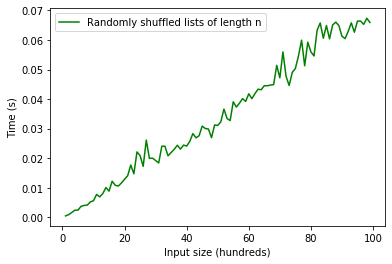

In [4]:
plt.plot([i for i in range(1, n)], avg_runtimes, 'g', label='Randomly shuffled lists of length n')

plt.xlabel("Input size (hundreds)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

## Question 4.

### Question 4a.

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [5]:
def qsort(lst):
    """
    Input: Unsorted list of floats or ints
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements in the partition
        
        # List of first, middle, and last indices of the list
        inds = [frm + int(N * n) for n in locations]
        
        # List of the elements at the positions in inds
        values = [lst[ind] for ind in inds]
        
        # Define partition as the median of the values at the three positions above
        partition = median(*values)

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        """
        We don't separate the elements equal to the partition, as they are already sorted
        """
        lst[frm:ind1] = lower
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [6]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b.

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

In [7]:
def qsort_updated(lst):
    """
    Input: Unsorted list of floats or ints
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm # Number of elements in the partition
        
        # List of first, middle, and last indices of the list
        inds = [frm + int(N * n) for n in locations]
        
        # List of the elements at the positions in inds
        values = [lst[ind] for ind in inds]
        
        # Define partition as the median of the values at the three positions above
        partition = median(*values)

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        """
        We don't separate the elements equal to the partition, as they are already sorted
        """
        lst[frm:ind1] = lower
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort_updated(lst):
    """
    Input: None
    
    Output: Sorted list (from a randomly shuffled list of consecutive integers)
    """
    random.shuffle(lst)
    return qsort_updated(lst)

avg_runtimes_prime = []

for i in range(1, n):
    runtimes_prime = []
    for trial in range(trials):
        list_k = []
        # Generate random list with values constrained by the size of the input
        for j in range(1, 100*i):
            el = random.randint(1,j)
            list_k.append(el)
        starting_time1 = time.time()
        randomized_quicksort_updated(list_k)   
        ending_time1 = time.time()
        runtimes_prime.append(ending_time1 - starting_time1)
    avg_runtimes_prime.append(sum(runtimes_prime)/len(runtimes_prime))

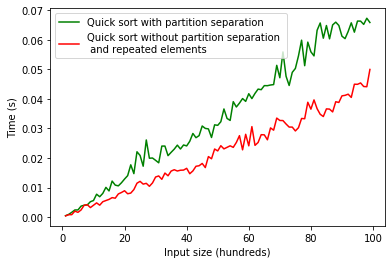

In [8]:
plt.plot([i for i in range(1, n)], avg_runtimes, 'g', label='Quick sort with partition separation')
plt.plot([i for i in range(1, n)], avg_runtimes_prime, 'r', label='Quick sort without partition separation \n and repeated elements')

plt.xlabel("Input size (hundreds)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

## Question 5.

### Question 5a.

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [9]:
def qsort(lst):
    """
    Input: Unsorted list of floats or ints
    
    This version of quicksort will use the first element in the array as the pivot
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Define partition as the first element of a subarray
        partition = lst[frm]

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        """
        We now separate the elements equal to the partition again, otherwise 
        """
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]*counts
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

In [10]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b.

Does this change the running time of your algorithm? Justify your response with a graph. 



Not quite, as both algorithms have advantages that balance out. We know don't iteratively compute partition values for this version of quick-sort, but we do expect the medians to be "better" pivots on average than the first element of all subarrays. Alas, to find the median we need more computation power than for just selecting the first elements of the subarrays. <br>
We can see from the graph that this quick-sort algorithm slightly trails the first version without repeated elements in the input, while still having larger runtime than the second version with inputs with repeated elements.

In [11]:
def qsort_3point0(lst):
    """
    Input: Unsorted list of floats or ints
    
    This version of quicksort will use the first element in the array as the pivot
    
    Output: Sorted list
    """
    
    # Define an iterable list of indices for the input
    indices = [(0, len(lst))]
    
    while indices:
        
        # Define a tuple with 1st (0) and n-1-th indices of the list
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Define partition as the first element of a subarray
        partition = lst[frm]

        # Split into lists:
        # List all elements with values below the partition's (chosen median)
        lower = [a for a in lst[frm:to] if a < partition]
        # List all elements with values above the partition's
        upper = [a for a in lst[frm:to] if a > partition]
        
        # Count the number of elements equal to the median in our list
        counts = sum([1 for a in lst[frm:to] if a == partition])
        
        # Define the indices that limit the 'lower' (left) and the 'upper' (right) groups
        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        # Put all elements from the list in their positions according to their comparison with the median
        """
        We now separate the elements equal to the partition again, otherwise 
        """
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]*counts
        lst[ind2:to] = upper

        # Enqueue other locations
        # Repeat the procedure for the subarrays until the lists are sorted (frm == to)
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst

def randomized_quicksort_3point0(lst):
    """
    Input: None
    
    Output: Sorted list (from a randomly shuffled list of consecutive integers)
    """
    random.shuffle(lst)
    return qsort_3point0(lst)

avg_runtimes_3point0 = []

for i in range(1, n):
    runtimes_3point0 = []
    
    # Define lists of different input sizes with the first positive integers up to n
    for trial in range(trials):
        list_3point0 = [j for j in range(1, i*100, 1)]

        starting_time2 = time.time()
        randomized_quicksort_3point0(list_3point0)   
        ending_time2 = time.time()
        runtimes_3point0.append(ending_time2 - starting_time2)
    avg_runtimes_3point0.append(sum(runtimes_3point0)/len(runtimes_3point0))

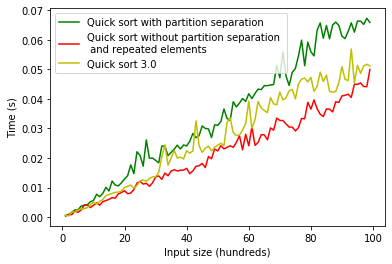

In [12]:
plt.plot([i for i in range(1, n)], avg_runtimes, 'g', label='Quick sort with partition separation')
plt.plot([i for i in range(1, n)], avg_runtimes_prime, 'r', label='Quick sort without partition separation \n and repeated elements')
plt.plot([i for i in range(1, n)], avg_runtimes_3point0, 'y', label='Quick sort 3.0')

plt.xlabel("Input size (hundreds)")
plt.ylabel("Time (s)")
plt.legend()
plt.show()

## Part B. Recursive quicksort. 

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


For this limitation in the number of recursive calls to determine a maximum size of the list to be sorted, we need to find the number of recursive calls for an input of size n. <br>
We have two recursive calls for every call on recursive quicksort. Thus, for an input size of n, we have a binary tree with depth $\log{n}$. This means we have $\log{n}$ recursive calls, and so if we hold $\log{n}\leq500$, this means we have $n\leq2^{500}$. <br>
In this case, we assume there is a constant number of recursive calls for a given input size.